In [633]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
import seaborn as sns
import  matplotlib.pyplot as plt

In [634]:
##This is my dataset and I named it as data and finding the shape which shows 50000 column and 19 rows.
data = pd.read_csv("H2HBABBA1582.csv")
data.shape

(50000, 19)

In [635]:
 
#checking which column have null values in it
[col for col in data.columns if data[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

In [636]:
#checking columnwise total null values
data.isnull().sum()



business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [637]:
#split into hello_train set and hello_test set
hello_train=data[data.clear_date.notnull()]
print(hello_train.shape)
hello_test=data[data.clear_date.isnull()]
print(hello_test.shape)



(40000, 19)
(10000, 19)


In [638]:
hello_test.shape

(10000, 19)

In [639]:
hello_train.shape

(40000, 19)

In [640]:
#checking columnwise total null values
print(hello_train.isnull().sum())



business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64


In [641]:
#droping the area_business column as it contains only null values
hello_train.drop('area_business',axis=1,inplace=True)
print(hello_train.shape)

(40000, 18)


In [642]:
#checking for duplicacy and removing it
print(hello_train.duplicated().sum())
hello_train=hello_train.drop_duplicates(keep='first')
print(hello_train.shape)
hello_train.isnull().sum()

818
(39182, 18)


business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                8
isOpen                    0
dtype: int64

In [643]:
hello_train.shape

(39182, 18)

In [644]:
#cheching the corelation between columns in the dataframe
cor_df=hello_train.corr()
cor_df

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.005376,0.950402,0.962997,0.976146,NaN,-0.008502,0.964699,-0.003647,NaN
doc_id,-0.005376,1.000000,-0.003570,-0.006568,-0.007638,NaN,0.180461,-0.001797,1.000000,NaN
document_create_date,0.950402,-0.003570,1.000000,0.985770,0.942304,NaN,-0.004404,0.983945,-0.001360,NaN
document_create_date.1,0.962997,-0.006568,0.985770,1.000000,0.953749,NaN,-0.006460,0.997953,-0.004407,NaN
due_in_date,0.976146,-0.007638,0.942304,0.953749,1.000000,NaN,-0.008862,0.955726,-0.005378,NaN
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.008502,0.180461,-0.004404,-0.006460,-0.008862,NaN,1.000000,-0.005207,0.195848,NaN
baseline_create_date,0.964699,-0.001797,0.983945,0.997953,0.955726,NaN,-0.005207,1.000000,0.000701,NaN
invoice_id,-0.003647,1.000000,-0.001360,-0.004407,-0.005378,NaN,0.195848,0.000701,1.000000,NaN
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [645]:
#checkin datatypes
hello_train.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [646]:
#dropping the invoiceid as it is high corelation with docid
hello_train=hello_train.drop('invoice_id',axis=1)
hello_train.shape
#dropping the base_line_create_date as it is also very high corelation with document_create_date
hello_train.drop('baseline_create_date',axis=1,inplace=True)
hello_train.shape

(39182, 16)

In [647]:
#removing constant columns from hello_train
[col for col in hello_train.columns if len(hello_train[col].unique())==1]
hello_train=hello_train.loc[:,hello_train.apply(pd.Series.nunique)!=1]
print(hello_train.shape)
hello_train
#Converting the cad values to usd values 
hello_train.loc[hello_train['invoice_currency']=='CAD','total_open_amount']=hello_train.total_open_amount*0.81
hello_train
hello_train.loc[hello_train.invoice_currency=='CAD','invoice_currency']='USD'
hello_train

(39182, 14)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
3,U001,0200705742,DOT corporation,2019-03-08 00:00:00,2019.0,1.928839e+09,2019-02-21,20190221,20190221,20190327.0,USD,RV,51180.1700,NAAW
5,U001,0200707822,PUBLI co,2020-03-02 00:00:00,2020.0,1.930533e+09,2020-02-16,20200216,20200216,20200302.0,USD,RV,71689.0500,NAA8
6,U001,0200769623,WAL-MAR in,2019-06-05 00:00:00,2019.0,1.929379e+09,2019-05-26,20190525,20190526,20190610.0,USD,RV,26251.1600,NAH4
7,U001,0200711029,WEGMAN trust,2019-07-24 00:00:00,2019.0,1.929589e+09,2019-07-09,20190708,20190709,20190724.0,USD,RV,12375.4900,NAA8
9,U001,0200763814,SYSCO F llc,2019-06-18 00:00:00,2019.0,1.929290e+09,2019-05-15,20190509,20190515,20190604.0,USD,RV,1733.5000,NAD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200803720,DEC foundation,2019-12-02 00:00:00,2019.0,1.930188e+09,2019-11-23,20191123,20191123,20191209.0,USD,RV,2528.1400,NAM4
49995,U001,0200797452,US systems,2019-05-29 00:00:00,2019.0,1.929304e+09,2019-05-14,20190512,20190514,20190529.0,USD,RV,33469.1800,NAA8
49997,CA02,0140105686,SYSC co,2019-05-30 00:00:00,2019.0,2.960547e+09,2019-05-11,20190511,20190511,20190524.0,USD,RV,15498.9855,CA10
49998,U001,0200779906,BOZZU us,2019-09-23 00:00:00,2019.0,1.929830e+09,2019-09-05,20190905,20190905,20190920.0,USD,RV,715.4300,NAA8


In [648]:
#as now invoice currency becomes a constant column as it contains only a single value which is usd hence dropping it
print(hello_train.invoice_currency.value_counts())
hello_train.drop('invoice_currency',axis=1,inplace=True)
hello_train.shape


USD    39182
Name: invoice_currency, dtype: int64


(39182, 13)

In [649]:
#finding the delay and converting all dates to date format

hello_train.posting_date=pd.to_datetime(hello_train.posting_date)
hello_train.clear_date=pd.to_datetime(hello_train.clear_date)
hello_train.due_in_date=pd.to_datetime(hello_train['due_in_date'],format='%Y%m%d')
hello_train.loc[:,'target']=(hello_train.clear_date-hello_train.due_in_date).dt.days
hello_train.drop('clear_date',axis=1,inplace=True)
hello_train.dtypes
hello_train.shape

(39182, 13)

In [650]:
hello_train.info

<bound method DataFrame.info of       business_code cust_number    name_customer  buisness_year        doc_id  \
3              U001  0200705742  DOT corporation         2019.0  1.928839e+09   
5              U001  0200707822         PUBLI co         2020.0  1.930533e+09   
6              U001  0200769623       WAL-MAR in         2019.0  1.929379e+09   
7              U001  0200711029     WEGMAN trust         2019.0  1.929589e+09   
9              U001  0200763814      SYSCO F llc         2019.0  1.929290e+09   
...             ...         ...              ...            ...           ...   
49994          U001  0200803720   DEC foundation         2019.0  1.930188e+09   
49995          U001  0200797452      US  systems         2019.0  1.929304e+09   
49997          CA02  0140105686          SYSC co         2019.0  2.960547e+09   
49998          U001  0200779906         BOZZU us         2019.0  1.929830e+09   
49999          U001  0200756072       REINHA llc         2019.0  1.930277e+09

In [651]:
#checking column wise unique values
hello_train.nunique()


business_code                 6
cust_number                1325
name_customer              3890
buisness_year                 2
doc_id                    39182
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 491
document type                 2
total_open_amount         35769
cust_payment_terms           66
target                      176
dtype: int64

In [652]:
print(hello_train.business_code.value_counts())
# clubbing business_code with low occurance in dataset - to ensure model gets max information
hello_train['business_code'] = np.where(hello_train['business_code'].isin(['U005','U007']),"U005",hello_train['business_code'] )


U001    35310
CA02     3198
U013      542
U002      120
U005       10
U007        2
Name: business_code, dtype: int64


In [653]:
print(hello_train.document_create_date.corr(hello_train['document_create_date.1']))
#as corelarion is very high so dropping the documnet_create_date.1 column
hello_train.drop('document_create_date.1',axis=1,inplace=True)
hello_train.document_create_date=pd.to_datetime(hello_train.document_create_date,format='%Y%m%d')
hello_train

0.9857696865177727


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,document type,total_open_amount,cust_payment_terms,target
3,U001,0200705742,DOT corporation,2019.0,1.928839e+09,2019-02-21,2019-02-21,2019-03-27,RV,51180.1700,NAAW,-19
5,U001,0200707822,PUBLI co,2020.0,1.930533e+09,2020-02-16,2020-02-16,2020-03-02,RV,71689.0500,NAA8,0
6,U001,0200769623,WAL-MAR in,2019.0,1.929379e+09,2019-05-26,2019-05-25,2019-06-10,RV,26251.1600,NAH4,-5
7,U001,0200711029,WEGMAN trust,2019.0,1.929589e+09,2019-07-09,2019-07-08,2019-07-24,RV,12375.4900,NAA8,0
9,U001,0200763814,SYSCO F llc,2019.0,1.929290e+09,2019-05-15,2019-05-09,2019-06-04,RV,1733.5000,NAD1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200803720,DEC foundation,2019.0,1.930188e+09,2019-11-23,2019-11-23,2019-12-09,RV,2528.1400,NAM4,-7
49995,U001,0200797452,US systems,2019.0,1.929304e+09,2019-05-14,2019-05-12,2019-05-29,RV,33469.1800,NAA8,0
49997,CA02,0140105686,SYSC co,2019.0,2.960547e+09,2019-05-11,2019-05-11,2019-05-24,RV,15498.9855,CA10,6
49998,U001,0200779906,BOZZU us,2019.0,1.929830e+09,2019-09-05,2019-09-05,2019-09-20,RV,715.4300,NAA8,3


In [654]:
#sorting the data according to posting date in ascending order 
hello_train=hello_train.sort_values(by=['posting_date'],ascending=True)
hello_train
#train_set.dtypes


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,document type,total_open_amount,cust_payment_terms,target
21444,U001,0200769623,WAL-MAR systems,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,RV,1196.640,NAH4,3
24379,U001,0200769623,WAL-MAR llc,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,RV,9501.530,NAH4,-5
49233,U001,0200769623,WAL-MAR us,2019.0,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,RV,69578.990,NAH4,-4
11088,U001,0200752302,KROGER associates,2019.0,1.928531e+09,2018-12-30,2018-12-31,2019-01-14,RV,19717.150,NAA8,0
36992,U001,0200936373,SUPE trust,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,RV,93305.550,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49856,CA02,0140104392,FLANAG systems,2020.0,2.960618e+09,2020-02-27,2020-02-27,2020-03-09,RV,8672.184,CA10,1
8094,U001,0100004536,BAS systems,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-03-13,RV,18509.900,NAA8,-1
21563,U001,0200571849,US associates,2020.0,1.930580e+09,2020-02-27,2020-02-27,2020-03-18,RV,4230.720,NAD1,2
6665,U001,0100049079,ESSEX in,2020.0,1.930556e+09,2020-02-27,2020-02-21,2020-03-13,RV,14271.000,NAA8,6


In [655]:
#Setting x for train_test_split
x=hello_train.drop('target',axis=1)
x.shape

(39182, 11)

In [656]:
#setting y for train_test_split
y=hello_train.target
y.shape

(39182,)

In [657]:
#Split into train and intermediate test set
X_train,X_Intertest,Y_train,Y_InterTest=train_test_split(x,y,test_size=.30,random_state=0,shuffle=False)
X_train.shape,X_Intertest.shape

((27427, 11), (11755, 11))

In [658]:
#Split the intermediate test set to validation and test set
X_val,X_test,Y_val,Y_test=train_test_split(X_Intertest,Y_InterTest,test_size=.50,random_state=0,shuffle=False)
X_val.shape,X_test.shape

((5877, 11), (5878, 11))

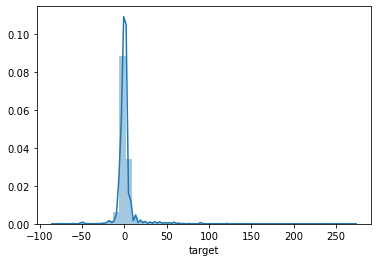

In [659]:
#EDA=electric design automation.
sns.distplot(Y_train)
#Y_train=np.log(train_set['target'])
#sns.distplot(train_set['target'])
#Here we basically got a right skewed graph

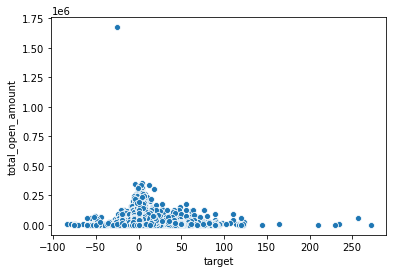

In [660]:
#Analyzing variation of target with total_open_amount
sns.scatterplot(data=X_train.merge(Y_train,on = X_train.index), x="target", y="total_open_amount")


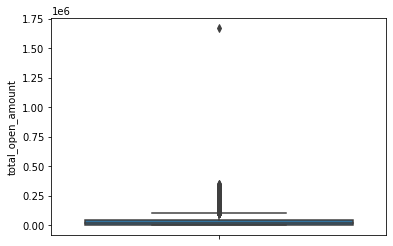

In [661]:
#box plot

sns.boxplot(y='total_open_amount',data=X_train)


In [662]:
#let's see this scatterplot,box plot and distplot clearly. It is showing some outliers which i am going to remove using IQR.

In [663]:
IQR= X_train['total_open_amount'].quantile(0.75)-X_train['total_open_amount'].quantile(0.25)
lower_range =X_train['total_open_amount'].quantile(0.25) -(1.5 * IQR)
upper_range =X_train['total_open_amount'].quantile(0.75) +(1.5 * IQR)
X_train.loc[X_train['total_open_amount']>upper_range,'total_open_amount']=X_train['total_open_amount'].mean()
#Removing Outliers

In [664]:
#Feature Engineering 
X_train.info()
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27427 non-null  object        
 1   cust_number           27427 non-null  object        
 2   name_customer         27427 non-null  object        
 3   buisness_year         27427 non-null  float64       
 4   doc_id                27427 non-null  float64       
 5   posting_date          27427 non-null  datetime64[ns]
 6   document_create_date  27427 non-null  datetime64[ns]
 7   due_in_date           27427 non-null  datetime64[ns]
 8   document type         27427 non-null  object        
 9   total_open_amount     27427 non-null  float64       
 10  cust_payment_terms    27427 non-null  object        
dtypes: datetime64[ns](3), float64(3), object(5)
memory usage: 2.5+ MB


(27427, 11)

In [665]:
#Label encoding business_code of train set
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_train[['business_code_enc','business_code']]
X_train.business_code_enc.value_counts()

1    24663
0     2240
4      419
2       93
3       12
Name: business_code_enc, dtype: int64

In [666]:
#Label encoding business_code of validation and test set
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [667]:
#dropping the old business_code column from all the 3 sets
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)
X_train.info()
X_test.business_code_enc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27427 non-null  object        
 1   name_customer         27427 non-null  object        
 2   buisness_year         27427 non-null  float64       
 3   doc_id                27427 non-null  float64       
 4   posting_date          27427 non-null  datetime64[ns]
 5   document_create_date  27427 non-null  datetime64[ns]
 6   due_in_date           27427 non-null  datetime64[ns]
 7   document type         27427 non-null  object        
 8   total_open_amount     27427 non-null  float64       
 9   cust_payment_terms    27427 non-null  object        
 10  business_code_enc     27427 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(1), object(4)
memory usage: 2.4+ MB


24140    1
4245     1
26870    1
49362    1
42771    1
        ..
49856    0
8094     1
21563    1
6665     1
4008     1
Name: business_code_enc, Length: 5878, dtype: int32

In [668]:
 ##function for deleting a column from train , val and test
def del_all(col ,traindf=X_train ,valdf=X_val ,testdf=X_test ):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf
# wrote a custom function to do a status check  on all the dataframes 
def check_all(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("_________________________________________")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("-----------------Train Null Count-----------------------")
    print(traindf.isna().sum())
    print("------------------Test Null Count ------------------------")
    print(testdf.isna().sum())    
    print("-------------------Val Null Count ------------------------")
    print(valdf.isna().sum())    

In [669]:
##As there is customer no present hence no need of customer name,hence dropping it
del_all(['name_customer'])
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27427 non-null  object        
 1   buisness_year         27427 non-null  float64       
 2   doc_id                27427 non-null  float64       
 3   posting_date          27427 non-null  datetime64[ns]
 4   document_create_date  27427 non-null  datetime64[ns]
 5   due_in_date           27427 non-null  datetime64[ns]
 6   document type         27427 non-null  object        
 7   total_open_amount     27427 non-null  float64       
 8   cust_payment_terms    27427 non-null  object        
 9   business_code_enc     27427 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(1), object(3)
memory usage: 2.2+ MB
None
_________________________________________
(27427, 10) (5877, 10) (5878, 10)
-----------------Train Null Co

In [670]:
#unique value of document_type
X_train['document type'].value_counts()

RV    27419
X2        8
Name: document type, dtype: int64

In [671]:
#As documnet type is acting as a quasi constant column so model cant get much from it hence dropping it.
del_all(['document type'])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27427 non-null  object        
 1   buisness_year         27427 non-null  float64       
 2   doc_id                27427 non-null  float64       
 3   posting_date          27427 non-null  datetime64[ns]
 4   document_create_date  27427 non-null  datetime64[ns]
 5   due_in_date           27427 non-null  datetime64[ns]
 6   total_open_amount     27427 non-null  float64       
 7   cust_payment_terms    27427 non-null  object        
 8   business_code_enc     27427 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(1), object(2)
memory usage: 2.0+ MB


In [672]:
#Label encoding cust_number column
cust_encoder = LabelEncoder()
cust_encoder.fit(X_train['cust_number'])
X_train['cust_no_enc'] = cust_encoder.transform(X_train['cust_number'])
X_train[['cust_no_enc','cust_number']]


,cust_no_enc,cust_number
21444,754,0200769623
24379,754,0200769623
49233,754,0200769623
11088,717,0200752302
36992,884,0200936373
...,...,...
27255,340,0140105686
28613,509,0200418007
24450,658,0200726979
48184,429,0200148860


In [674]:
#Deleting the old cust_number column
del_all(['cust_number'])

(       buisness_year        doc_id posting_date document_create_date  \
 21444         2019.0  1.928540e+09   2018-12-30           2018-12-29   
 24379         2019.0  1.928541e+09   2018-12-30           2018-12-29   
 49233         2019.0  1.928533e+09   2018-12-30           2018-12-29   
 11088         2019.0  1.928531e+09   2018-12-30           2018-12-31   
 36992         2019.0  1.928544e+09   2018-12-30           2018-12-30   
 ...              ...           ...          ...                  ...   
 27255         2019.0  2.960584e+09   2019-10-08           2019-10-08   
 28613         2019.0  1.929953e+09   2019-10-08           2019-10-02   
 24450         2019.0  1.929977e+09   2019-10-08           2019-10-07   
 48184         2019.0  1.929982e+09   2019-10-08           2019-10-07   
 2738          2019.0  1.929983e+09   2019-10-08           2019-10-08   
 
       due_in_date  total_open_amount cust_payment_terms  business_code_enc  \
 21444  2019-01-14           1196.640      

In [675]:
#Checking info
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buisness_year         27427 non-null  float64       
 1   doc_id                27427 non-null  float64       
 2   posting_date          27427 non-null  datetime64[ns]
 3   document_create_date  27427 non-null  datetime64[ns]
 4   due_in_date           27427 non-null  datetime64[ns]
 5   total_open_amount     27427 non-null  float64       
 6   cust_payment_terms    27427 non-null  object        
 7   business_code_enc     27427 non-null  int32         
 8   cust_no_enc           27427 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(2), object(1)
memory usage: 1.9+ MB
None
_________________________________________
(27427, 9) (5877, 9) (5878, 9)
-----------------Train Null Count-----------------------
buisness_year           0
doc_id   

In [676]:
#label encoding cust_paymenyt_terms 
cust_payment_encoder = LabelEncoder()
cust_payment_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_enc'] = cust_payment_encoder.transform(X_train['cust_payment_terms'])
X_train[['cust_payment_enc','cust_payment_terms']]


,cust_payment_enc,cust_payment_terms
21444,31,NAH4
24379,31,NAH4
49233,31,NAH4
11088,19,NAA8
36992,19,NAA8
...,...,...
27255,5,CA10
28613,19,NAA8
24450,19,NAA8
48184,19,NAA8


In [677]:
 #finding what are the new catagories in the validation set
diff3 = set(X_val['cust_payment_terms'])-set(cust_payment_encoder.classes_)
# adding them to the classess variable // 
for items in diff3:
    cust_payment_encoder.classes_ = np.append(cust_payment_encoder.classes_,items)
X_val['cust_payment_enc'] = cust_payment_encoder.transform(X_val['cust_payment_terms'])
#doing same for the test set
diff4 = set(X_test['cust_payment_terms'])-set(cust_payment_encoder.classes_)
# adding them to the classess variable // 
for items in diff4:
    cust_payment_encoder.classes_ = np.append(cust_payment_encoder.classes_,items)
X_test['cust_payment_enc'] = cust_payment_encoder.transform(X_test['cust_payment_terms'])

In [678]:
#deleting the old cust_payment_terms column
del_all(['cust_payment_terms'])
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buisness_year         27427 non-null  float64       
 1   doc_id                27427 non-null  float64       
 2   posting_date          27427 non-null  datetime64[ns]
 3   document_create_date  27427 non-null  datetime64[ns]
 4   due_in_date           27427 non-null  datetime64[ns]
 5   total_open_amount     27427 non-null  float64       
 6   business_code_enc     27427 non-null  int32         
 7   cust_no_enc           27427 non-null  int32         
 8   cust_payment_enc      27427 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(3)
memory usage: 1.8 MB
None
_________________________________________
(27427, 9) (5877, 9) (5878, 9)
-----------------Train Null Count-----------------------
buisness_year           0
doc_id               

In [679]:
#Checking with info
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buisness_year         27427 non-null  float64       
 1   doc_id                27427 non-null  float64       
 2   posting_date          27427 non-null  datetime64[ns]
 3   document_create_date  27427 non-null  datetime64[ns]
 4   due_in_date           27427 non-null  datetime64[ns]
 5   total_open_amount     27427 non-null  float64       
 6   business_code_enc     27427 non-null  int32         
 7   cust_no_enc           27427 non-null  int32         
 8   cust_payment_enc      27427 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(3)
memory usage: 1.8 MB
None
_________________________________________
(27427, 9) (5877, 9) (5878, 9)
-----------------Train Null Count-----------------------
buisness_year           0
doc_id               

In [680]:
#Transforming date to its day,month and yaer separately of due_in_date in all the 3 sets
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

In [681]:
#Deleting the old due_in_date column and checking info
del_all(['due_in_date'])
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buisness_year         27427 non-null  float64       
 1   doc_id                27427 non-null  float64       
 2   posting_date          27427 non-null  datetime64[ns]
 3   document_create_date  27427 non-null  datetime64[ns]
 4   total_open_amount     27427 non-null  float64       
 5   business_code_enc     27427 non-null  int32         
 6   cust_no_enc           27427 non-null  int32         
 7   cust_payment_enc      27427 non-null  int32         
 8   day_of_due            27427 non-null  int64         
 9   month_of_due          27427 non-null  int64         
 10  year_of_due           27427 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int32(3), int64(3)
memory usage: 2.2 MB
None
_________________________________________
(27427, 

In [682]:
#Transforming date to its day,month and yaer separately of due_in_date in all the 3 sets
X_train['day_of_create'] = X_train['document_create_date'].dt.day
X_train['month_of_create'] = X_train['document_create_date'].dt.month
X_train['year_of_create'] = X_train['document_create_date'].dt.year

X_val['day_of_create'] = X_val['document_create_date'].dt.day
X_val['month_of_create'] = X_val['document_create_date'].dt.month
X_val['year_of_create'] = X_val['document_create_date'].dt.year


X_test['day_of_create'] = X_test['document_create_date'].dt.day
X_test['month_of_create'] = X_test['document_create_date'].dt.month
X_test['year_of_create'] = X_test['document_create_date'].dt.year

In [683]:
#Deleting the old due_in_date column and checking info
del_all(['document_create_date'])
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buisness_year      27427 non-null  float64       
 1   doc_id             27427 non-null  float64       
 2   posting_date       27427 non-null  datetime64[ns]
 3   total_open_amount  27427 non-null  float64       
 4   business_code_enc  27427 non-null  int32         
 5   cust_no_enc        27427 non-null  int32         
 6   cust_payment_enc   27427 non-null  int32         
 7   day_of_due         27427 non-null  int64         
 8   month_of_due       27427 non-null  int64         
 9   year_of_due        27427 non-null  int64         
 10  day_of_create      27427 non-null  int64         
 11  month_of_create    27427 non-null  int64         
 12  year_of_create     27427 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(6)
memor

In [684]:
#Transforming date to its day,month and yaer separately of due_in_date in all the 3 sets
X_train['day_of_post'] = X_train['posting_date'].dt.day
X_train['month_of_post'] = X_train['posting_date'].dt.month
X_train['year_of_post'] = X_train['posting_date'].dt.year

X_val['day_of_post'] = X_val['posting_date'].dt.day
X_val['month_of_post'] = X_val['posting_date'].dt.month
X_val['year_of_post'] = X_val['posting_date'].dt.year


X_test['day_of_post'] = X_test['posting_date'].dt.day
X_test['month_of_post'] = X_test['posting_date'].dt.month
X_test['year_of_post'] = X_test['posting_date'].dt.year
#Deleting the old due_in_date column and checking info
del_all(['posting_date'])
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buisness_year      27427 non-null  float64
 1   doc_id             27427 non-null  float64
 2   total_open_amount  27427 non-null  float64
 3   business_code_enc  27427 non-null  int32  
 4   cust_no_enc        27427 non-null  int32  
 5   cust_payment_enc   27427 non-null  int32  
 6   day_of_due         27427 non-null  int64  
 7   month_of_due       27427 non-null  int64  
 8   year_of_due        27427 non-null  int64  
 9   day_of_create      27427 non-null  int64  
 10  month_of_create    27427 non-null  int64  
 11  year_of_create     27427 non-null  int64  
 12  day_of_post        27427 non-null  int64  
 13  month_of_post      27427 non-null  int64  
 14  year_of_post       27427 non-null  int64  
dtypes: float64(3), int32(3), int64(9)
memory usage: 3.0 MB
None
_______

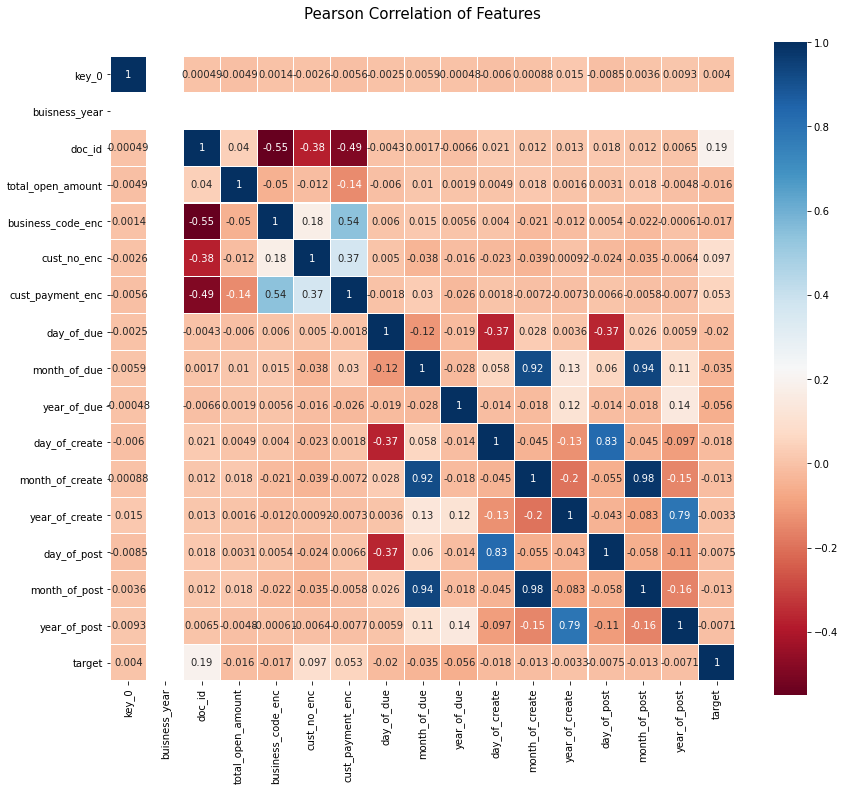

In [685]:
#plotting the correlation features
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [686]:
#Checking with thw variance thresold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.01)
sel.fit(X_train)


VarianceThreshold(threshold=0.01)

In [687]:

sum(sel.get_support())
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

['buisness_year', 'year_of_due', 'year_of_create', 'year_of_post']

In [688]:
#Here we can found that the bisness_year,year_of_create,year_of_due,year_of_post are quasi constant columns hence dropping it.
del_all(['buisness_year'])
del_all(['year_of_due'])
del_all(['year_of_create'])
del_all(['year_of_post'])
check_all()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27427 entries, 21444 to 2738
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             27427 non-null  float64
 1   total_open_amount  27427 non-null  float64
 2   business_code_enc  27427 non-null  int32  
 3   cust_no_enc        27427 non-null  int32  
 4   cust_payment_enc   27427 non-null  int32  
 5   day_of_due         27427 non-null  int64  
 6   month_of_due       27427 non-null  int64  
 7   day_of_create      27427 non-null  int64  
 8   month_of_create    27427 non-null  int64  
 9   day_of_post        27427 non-null  int64  
 10  month_of_post      27427 non-null  int64  
dtypes: float64(2), int32(3), int64(6)
memory usage: 2.2 MB
None
_________________________________________
(27427, 11) (5877, 11) (5878, 11)
-----------------Train Null Count-----------------------
doc_id               0
total_open_amount    0
business_code_enc   

In [689]:
#as everything is converted to float or int types hence we can fed it to the model
#Here i first try the linear model
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, Y_train)

LinearRegression()

In [690]:
#Predicting the value for validation set and compare that with th =e actual value and finding the mean square error
Y_predict = base_model.predict(X_val)
print(Y_predict,Y_train)
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_predict, squared=False)

[14.3686419   0.15250022  1.1198158  ... -1.55166702 -1.96446652
 -3.09687772] 21444     3
24379    -5
49233    -4
11088     0
36992     0
         ..
27255    13
28613     0
24450     0
48184     0
2738      0
Name: target, Length: 27427, dtype: int64


7.186753785756334

In [691]:
#Accuracy
base_model_accuracy = round(base_model.score(X_train,Y_train)*100,2)
print(round(base_model_accuracy,2),'%')

9.99 %


In [692]:
hello_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930791e+09,2020-04-16,20200415,20200416,20200501.0,USD,RV,1.0,NaN,22983.46,20200416.0,NAH4,1.930791e+09,1
1,CA02,0140104440,SO,NaN,2020.0,2.960630e+09,2020-04-22,20200422,20200422,20200502.0,CAD,RV,1.0,NaN,72831.32,20200422.0,CA10,2.960630e+09,1
2,U001,0200129450,NU corp,NaN,2020.0,1.930730e+09,2020-04-01,20200401,20200401,20200501.0,USD,RV,1.0,NaN,74325.76,20200401.0,NAD5,1.930730e+09,1
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930854e+09,2020-05-05,20200503,20200505,20200520.0,USD,RV,1.0,NaN,15261.18,20200505.0,NAH4,1.930854e+09,1
8,U001,0200886415,COSTCO corporation,NaN,2020.0,1.930572e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,NaN,11111.76,20200303.0,NAA8,1.930572e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,CA02,0140104429,COSTCO systems,NaN,2020.0,2.960621e+09,2020-03-19,20200319,20200319,20200404.0,CAD,RV,1.0,NaN,52992.99,20200325.0,CA10,2.960621e+09,1
49984,U001,0200706844,WINC in,NaN,2020.0,1.930718e+09,2020-03-31,20200329,20200331,20200415.0,USD,RV,1.0,NaN,11547.94,20200331.0,NAA8,1.930718e+09,1
49985,U001,0200778870,C systems,NaN,2020.0,1.930654e+09,2020-03-16,20200315,20200316,20200331.0,USD,RV,1.0,NaN,9332.60,20200316.0,NAA8,1.930654e+09,1
49991,U001,0200750051,ALBER corp,NaN,2020.0,1.930688e+09,2020-03-24,20200323,20200324,20200408.0,USD,RV,1.0,NaN,35129.93,20200324.0,NAA8,1.930688e+09,1


In [693]:
#checking the no of nulls column wise
hello_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [694]:
#Based on null values dropping the area business and clear_date columns
X_test_set=hello_test.drop('area_business',axis=1)
hello_test.drop('area_business',axis=1,inplace=True)
X_test_set=hello_test.drop('clear_date',axis=1)
hello_test.drop('clear_date',axis=1,inplace=True)
hello_test.shape

(10000, 17)

In [695]:
#dropping the invoiceid as it is high corelation with docid
X_test_set=hello_test.drop('invoice_id',axis=1)
X_test_set.shape
#dropping the base_line_create_date as it is also very high corelation with document_create_date
X_test_set.drop('baseline_create_date',axis=1,inplace=True)
X_test_set.shape
#Deleting the duplicated rows
print(X_test_set.duplicated().sum())
X_test_set=X_test_set.drop_duplicates(keep='first')
X_test_set.shape
#doing same for the main test set also,otherwise at the time of adding predicted delay column error will occur
print(hello_test.duplicated().sum())
hello_test=hello_test.drop_duplicates(keep='first')
hello_test.shape

295
295


(9705, 17)

In [696]:
#removing constant columns from train_set
[col for col in X_test_set.columns if len(X_test_set[col].unique())==1]
X_test_set=X_test_set.loc[:,X_test_set.apply(pd.Series.nunique)!=1]
print(X_test_set.shape)
X_test_set
#Converting the cad values to usd values 
X_test_set.loc[X_test_set['invoice_currency']=='CAD','total_open_amount']=X_test_set.total_open_amount*0.81
X_test_set
X_test_set.loc[X_test_set.invoice_currency=='CAD','invoice_currency']='USD'
X_test_set
#as now invoice currency becomes a constant column as it contains only a single value which is usd hence dropping it
print(X_test_set.invoice_currency.value_counts())
X_test_set.drop('invoice_currency',axis=1,inplace=True)
X_test_set.shape


(9705, 11)
USD    9705
Name: invoice_currency, dtype: int64


(9705, 10)

In [697]:
#Converting from object and float type to date format
X_test_set.posting_date=pd.to_datetime(X_test_set.posting_date)
X_test_set.due_in_date=pd.to_datetime(X_test_set['due_in_date'],format='%Y%m%d')

In [698]:
print(X_test_set.business_code.value_counts())
# clubbing business_code with low occurance in dataset - to ensure model gets max information
X_test_set['business_code'] = np.where(X_test_set['business_code'].isin(['U005','U007']),"U005",X_test_set['business_code'] )


U001    8932
CA02     678
U013      58
U002      34
U005       2
U007       1
Name: business_code, dtype: int64


In [699]:
print(X_test_set.document_create_date.corr(X_test_set['document_create_date.1']))
#as corelarion is very high so dropping the documnet_create_date.1 column
X_test_set.drop('document_create_date.1',axis=1,inplace=True)
X_test_set.document_create_date=pd.to_datetime(X_test_set.document_create_date,format='%Y%m%d')
X_test_set

0.98315648948611


,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corporation,1.930791e+09,2020-04-16,2020-04-15,2020-05-01,22983.4600,NAH4
1,CA02,0140104440,SO,2.960630e+09,2020-04-22,2020-04-22,2020-05-02,58993.3692,CA10
2,U001,0200129450,NU corp,1.930730e+09,2020-04-01,2020-04-01,2020-05-01,74325.7600,NAD5
4,U001,0200769623,WAL-MAR,1.930854e+09,2020-05-05,2020-05-03,2020-05-20,15261.1800,NAH4
8,U001,0200886415,COSTCO corporation,1.930572e+09,2020-03-03,2020-03-02,2020-03-18,11111.7600,NAA8
...,...,...,...,...,...,...,...,...,...
49983,CA02,0140104429,COSTCO systems,2.960621e+09,2020-03-19,2020-03-19,2020-04-04,42924.3219,CA10
49984,U001,0200706844,WINC in,1.930718e+09,2020-03-31,2020-03-29,2020-04-15,11547.9400,NAA8
49985,U001,0200778870,C systems,1.930654e+09,2020-03-16,2020-03-15,2020-03-31,9332.6000,NAA8
49991,U001,0200750051,ALBER corp,1.930688e+09,2020-03-24,2020-03-23,2020-04-08,35129.9300,NAA8


In [700]:
#sort according to the posting date
X_test_set=X_test_set.sort_values(by=['posting_date'],ascending=True)

X_test_set.dtypes


business_code                   object
cust_number                     object
name_customer                   object
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
cust_payment_terms              object
dtype: object

In [701]:
#label encoding for business code column for main test set
business_code_encoder.fit(X_test_set['business_code'])
X_test_set['business_code_enc'] = business_code_encoder.transform(X_test_set['business_code'])
X_test_set[['business_code_enc','business_code']]


,business_code_enc,business_code
34835,1,U001
15475,1,U001
34701,1,U001
34829,1,U001
33251,1,U001
...,...,...
3067,1,U001
17683,0,CA02
9501,0,CA02
33191,1,U001


In [702]:
#dropping the old busness code column
X_test_set.drop(['business_code'], axis =1,inplace=True)
X_test_set.shape

(9705, 9)

In [703]:
#checking info
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 34835 to 47571
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           9705 non-null   object        
 1   name_customer         9705 non-null   object        
 2   doc_id                9705 non-null   float64       
 3   posting_date          9705 non-null   datetime64[ns]
 4   document_create_date  9705 non-null   datetime64[ns]
 5   due_in_date           9705 non-null   datetime64[ns]
 6   total_open_amount     9705 non-null   float64       
 7   cust_payment_terms    9705 non-null   object        
 8   business_code_enc     9705 non-null   int32         
dtypes: datetime64[ns](3), float64(2), int32(1), object(3)
memory usage: 720.3+ KB


In [704]:
##As there is customer no present hence no need of customer name,hence dropping it
X_test_set.drop('name_customer',axis=1,inplace=True)
X_test_set.shape

(9705, 8)

In [705]:
#label encoding cust_number
cust_encoder.fit(X_test_set['cust_number'])
X_test_set['cust_no_enc'] = cust_encoder.transform(X_test_set['cust_number'])
X_test_set.drop('cust_number',axis=1,inplace=True)
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 34835 to 47571
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   doc_id                9705 non-null   float64       
 1   posting_date          9705 non-null   datetime64[ns]
 2   document_create_date  9705 non-null   datetime64[ns]
 3   due_in_date           9705 non-null   datetime64[ns]
 4   total_open_amount     9705 non-null   float64       
 5   cust_payment_terms    9705 non-null   object        
 6   business_code_enc     9705 non-null   int32         
 7   cust_no_enc           9705 non-null   int32         
dtypes: datetime64[ns](3), float64(2), int32(2), object(1)
memory usage: 606.6+ KB


In [706]:
#label encoding cust_payment terms column
cust_payment_encoder.fit(X_test_set['cust_payment_terms'])
X_test_set['cust_payment_enc'] = cust_payment_encoder.transform(X_test_set['cust_payment_terms'])
X_test_set.drop('cust_payment_terms',axis=1,inplace=True)
X_test_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 34835 to 47571
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   doc_id                9705 non-null   float64       
 1   posting_date          9705 non-null   datetime64[ns]
 2   document_create_date  9705 non-null   datetime64[ns]
 3   due_in_date           9705 non-null   datetime64[ns]
 4   total_open_amount     9705 non-null   float64       
 5   business_code_enc     9705 non-null   int32         
 6   cust_no_enc           9705 non-null   int32         
 7   cust_payment_enc      9705 non-null   int32         
dtypes: datetime64[ns](3), float64(2), int32(3)
memory usage: 568.7 KB


In [707]:
#Extracting the day,month,year from all the date types as model cant use date type
X_test_set['day_of_due'] = X_test_set['due_in_date'].dt.day
X_test_set['month_of_due'] = X_test_set['due_in_date'].dt.month
X_test_set['year_of_due'] = X_test_set['due_in_date'].dt.year

X_test_set['day_of_create'] = X_test_set['document_create_date'].dt.day
X_test_set['month_of_create'] = X_test_set['document_create_date'].dt.month
X_test_set['year_of_create'] = X_test_set['document_create_date'].dt.year

X_test_set['day_of_post'] = X_test_set['posting_date'].dt.day
X_test_set['month_of_post'] = X_test_set['posting_date'].dt.month
X_test_set['year_of_post'] = X_test_set['posting_date'].dt.year
#dropping the original date columns
X_test_set.drop(['posting_date','document_create_date','due_in_date'],axis=1,inplace=True)

#checking info
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 34835 to 47571
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             9705 non-null   float64
 1   total_open_amount  9705 non-null   float64
 2   business_code_enc  9705 non-null   int32  
 3   cust_no_enc        9705 non-null   int32  
 4   cust_payment_enc   9705 non-null   int32  
 5   day_of_due         9705 non-null   int64  
 6   month_of_due       9705 non-null   int64  
 7   year_of_due        9705 non-null   int64  
 8   day_of_create      9705 non-null   int64  
 9   month_of_create    9705 non-null   int64  
 10  year_of_create     9705 non-null   int64  
 11  day_of_post        9705 non-null   int64  
 12  month_of_post      9705 non-null   int64  
 13  year_of_post       9705 non-null   int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 1023.6 KB


In [708]:
#columns of train set
X_train.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'cust_no_enc',
       'cust_payment_enc', 'day_of_due', 'month_of_due', 'day_of_create',
       'month_of_create', 'day_of_post', 'month_of_post'],
      dtype='object')

In [709]:
#columns of test set
X_test_set.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'cust_no_enc',
       'cust_payment_enc', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_create', 'month_of_create', 'year_of_create', 'day_of_post',
       'month_of_post', 'year_of_post'],
      dtype='object')

In [710]:
#as test set has more columns hence dropping the unnecessary columns
X_test_set.drop(['year_of_due','year_of_create','year_of_post'],axis=1,inplace=True)
X_test_set.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'cust_no_enc',
       'cust_payment_enc', 'day_of_due', 'month_of_due', 'day_of_create',
       'month_of_create', 'day_of_post', 'month_of_post'],
      dtype='object')

In [711]:
#predicting on final test set
final_result = regressor.predict(X_test_set)


In [712]:
#renaming the result to delay 
final_result = pd.Series(final_result,name='Delay')

In [713]:
#Resetting the index of test set
hello_test.reset_index(drop=True,inplace=True)

In [714]:
from datetime import datetime, timedelta
Final = hello_test.merge(final_result , on = X_test_set.index )
Final.Delay=Final.Delay.astype('int')
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 9704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key_0                   9705 non-null   int64  
 1   business_code           9705 non-null   object 
 2   cust_number             9705 non-null   object 
 3   name_customer           9705 non-null   object 
 4   buisness_year           9705 non-null   float64
 5   doc_id                  9705 non-null   float64
 6   posting_date            9705 non-null   object 
 7   document_create_date    9705 non-null   int64  
 8   document_create_date.1  9705 non-null   int64  
 9   due_in_date             9705 non-null   float64
 10  invoice_currency        9705 non-null   object 
 11  document type           9705 non-null   object 
 12  posting_id              9705 non-null   float64
 13  total_open_amount       9705 non-null   float64
 14  baseline_create_date    9705 non-null   

In [715]:
#Adding the predicted delay to the due_in_date to get our clear date.
Final['clear_date']=pd.to_datetime(Final['due_in_date'],format='%Y%m%d')+pd.to_timedelta(Final['Delay'],unit='D')

In [716]:
#Displaying the final dataset with the predicted clear_date
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,clear_date
0,34835,U001,0200769623,WAL-MAR corporation,2020.0,1.930791e+09,2020-04-16,20200415,20200416,20200501.0,USD,RV,1.0,22983.46,20200416.0,NAH4,1.930791e+09,1,-14,2020-04-17
1,15475,CA02,0140104440,SO,2020.0,2.960630e+09,2020-04-22,20200422,20200422,20200502.0,CAD,RV,1.0,72831.32,20200422.0,CA10,2.960630e+09,1,-1,2020-05-01
2,34701,U001,0200129450,NU corp,2020.0,1.930730e+09,2020-04-01,20200401,20200401,20200501.0,USD,RV,1.0,74325.76,20200401.0,NAD5,1.930730e+09,1,1,2020-05-02
3,34829,U001,0200769623,WAL-MAR,2020.0,1.930854e+09,2020-05-05,20200503,20200505,20200520.0,USD,RV,1.0,15261.18,20200505.0,NAH4,1.930854e+09,1,-1,2020-05-19
4,33251,U001,0200886415,COSTCO corporation,2020.0,1.930572e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,11111.76,20200303.0,NAA8,1.930572e+09,1,-19,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,3067,CA02,0140104429,COSTCO systems,2020.0,2.960621e+09,2020-03-19,20200319,20200319,20200404.0,CAD,RV,1.0,52992.99,20200325.0,CA10,2.960621e+09,1,-14,2020-03-21
9701,17683,U001,0200706844,WINC in,2020.0,1.930718e+09,2020-03-31,20200329,20200331,20200415.0,USD,RV,1.0,11547.94,20200331.0,NAA8,1.930718e+09,1,9,2020-04-24
9702,9501,U001,0200778870,C systems,2020.0,1.930654e+09,2020-03-16,20200315,20200316,20200331.0,USD,RV,1.0,9332.60,20200316.0,NAA8,1.930654e+09,1,7,2020-04-07
9703,33191,U001,0200750051,ALBER corp,2020.0,1.930688e+09,2020-03-24,20200323,20200324,20200408.0,USD,RV,1.0,35129.93,20200324.0,NAA8,1.930688e+09,1,-10,2020-03-29


In [717]:
Final.due_in_date=pd.to_datetime(Final['due_in_date'],format='%Y%m%d')

In [718]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,clear_date
0,34835,U001,0200769623,WAL-MAR corporation,2020.0,1.930791e+09,2020-04-16,20200415,20200416,2020-05-01,USD,RV,1.0,22983.46,20200416.0,NAH4,1.930791e+09,1,-14,2020-04-17
1,15475,CA02,0140104440,SO,2020.0,2.960630e+09,2020-04-22,20200422,20200422,2020-05-02,CAD,RV,1.0,72831.32,20200422.0,CA10,2.960630e+09,1,-1,2020-05-01
2,34701,U001,0200129450,NU corp,2020.0,1.930730e+09,2020-04-01,20200401,20200401,2020-05-01,USD,RV,1.0,74325.76,20200401.0,NAD5,1.930730e+09,1,1,2020-05-02
3,34829,U001,0200769623,WAL-MAR,2020.0,1.930854e+09,2020-05-05,20200503,20200505,2020-05-20,USD,RV,1.0,15261.18,20200505.0,NAH4,1.930854e+09,1,-1,2020-05-19
4,33251,U001,0200886415,COSTCO corporation,2020.0,1.930572e+09,2020-03-03,20200302,20200303,2020-03-18,USD,RV,1.0,11111.76,20200303.0,NAA8,1.930572e+09,1,-19,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,3067,CA02,0140104429,COSTCO systems,2020.0,2.960621e+09,2020-03-19,20200319,20200319,2020-04-04,CAD,RV,1.0,52992.99,20200325.0,CA10,2.960621e+09,1,-14,2020-03-21
9701,17683,U001,0200706844,WINC in,2020.0,1.930718e+09,2020-03-31,20200329,20200331,2020-04-15,USD,RV,1.0,11547.94,20200331.0,NAA8,1.930718e+09,1,9,2020-04-24
9702,9501,U001,0200778870,C systems,2020.0,1.930654e+09,2020-03-16,20200315,20200316,2020-03-31,USD,RV,1.0,9332.60,20200316.0,NAA8,1.930654e+09,1,7,2020-04-07
9703,33191,U001,0200750051,ALBER corp,2020.0,1.930688e+09,2020-03-24,20200323,20200324,2020-04-08,USD,RV,1.0,35129.93,20200324.0,NAA8,1.930688e+09,1,-10,2020-03-29
